In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from math import radians, sin, cos, asin, sqrt

In [2]:
customer = pd.read_csv('customer_join.csv')
uselog_months = pd.read_csv('use_log_months.csv')

In [3]:
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,4,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,5,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,5,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,5,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,5,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,3,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,3,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,2,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,3,0,2019-04-30,1


In [4]:
uselog_months

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [5]:
year_months = list(uselog_months['年月'].unique())
uselog = pd.DataFrame()
for i in range(1, len(year_months)):
    tmp = uselog_months.loc[uselog_months['年月']==year_months[i]].copy()
    tmp.rename(columns={'count': 'count_0'}, inplace=True)
    tmp_before = uselog_months.loc[uselog_months['年月']==year_months[i-1]].copy()
    del tmp_before['年月']
    tmp_before.rename(columns={'count': 'count_1'}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on='customer_id', how='left')
    uselog = pd.concat([uselog, tmp], ignore_index=True)

In [6]:
uselog

,年月,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0
...,...,...,...,...
33846,201903,TS995853,8,11.0
33847,201903,TS998593,8,7.0
33848,201903,TS999079,3,2.0
33849,201903,TS999231,6,6.0


In [7]:
customer['end_date'].unique()

array([nan, '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
       '2018-08-31', '2018-09-30', '2018-11-30', '2018-12-31',
       '2019-01-31', '2018-10-31', '2019-02-28', '2019-03-31'],
      dtype=object)

In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        4192 non-null   object 
 1   name               4192 non-null   object 
 2   class              4192 non-null   object 
 3   gender             4192 non-null   object 
 4   start_date         4192 non-null   object 
 5   end_date           1350 non-null   object 
 6   campaign_id        4192 non-null   object 
 7   is_deleted         4192 non-null   int64  
 8   class_name         4192 non-null   object 
 9   price              4192 non-null   int64  
 10  campaign_name      4192 non-null   object 
 11  mean               4192 non-null   float64
 12  median             4192 non-null   float64
 13  max                4192 non-null   int64  
 14  min                4192 non-null   int64  
 15  count              4192 non-null   int64  
 16  routine_flg        4192 

In [9]:
from dateutil.relativedelta import relativedelta
exit_customer = customer.loc[customer['is_deleted']==1].copy()
exit_customer['exit_date'] = None
exit_customer['end_date'] = pd.to_datetime(exit_customer['end_date'])
for i in exit_customer.index:
    exit_customer.loc[i, 'exit_date'] = exit_customer.loc[i, 'end_date'] - relativedelta(months=1)
exit_customer['exit_date'] = pd.to_datetime(exit_customer['exit_date'])
exit_customer['年月'] = exit_customer['exit_date'].dt.strftime('%Y%m')
uselog['年月'] = uselog['年月'].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on=['customer_id', '年月'], how='left')
print(len(uselog))
exit_uselog

33851


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,campaign_name,mean,median,max,min,count,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,201903,TS995853,8,11.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33847,201903,TS998593,8,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33848,201903,TS999079,3,2.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33849,201903,TS999231,6,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [10]:
exit_uselog = exit_uselog.dropna(subset=['name'])
print(len(exit_uselog))
print(len(exit_uselog['customer_id'].unique()))
exit_uselog

1104
1104


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,campaign_name,mean,median,max,min,count,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,通常,3.000000,3.0,3.0,3.0,2.0,0.0,2018-06-30,3.0,2018-05-30
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,通常,3.000000,3.0,4.0,2.0,4.0,1.0,2018-06-30,7.0,2018-05-30
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,通常,3.333333,3.0,5.0,2.0,1.0,0.0,2018-06-30,12.0,2018-05-30
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,通常,3.333333,3.0,5.0,2.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,通常,2.000000,1.0,4.0,1.0,1.0,0.0,2018-06-30,9.0,2018-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30758,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31,CA1,...,通常,4.500000,4.5,7.0,1.0,3.0,0.0,2019-03-31,12.0,2019-02-28
30787,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31,CA3,...,入会費無料,6.250000,6.0,8.0,5.0,3.0,0.0,2019-03-31,3.0,2019-02-28
30827,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31,CA3,...,入会費無料,2.500000,2.0,5.0,1.0,2.0,0.0,2019-03-31,3.0,2019-02-28
30842,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31,CA1,...,通常,4.250000,4.0,7.0,2.0,4.0,1.0,2019-03-31,12.0,2019-02-28


In [11]:
conti_customer = customer.loc[customer['is_deleted']==0]
conti_uselog = pd.merge(uselog, conti_customer, on=['customer_id'], how='left')
print(len(conti_uselog))
conti_uselog = conti_uselog.dropna(subset='name')
print(len(conti_uselog))

33851
27422


In [12]:
conti_uselog = conti_uselog.sample(frac=1, random_state=0).reset_index(drop=True)
conti_uselog = conti_uselog.drop_duplicates(subset='customer_id')
print(len(conti_uselog))
conti_uselog

2842


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,count,routine_flg,calc_date,membership_period
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaN,CA2,...,10500.0,入会費半額,7.545455,7.0,11.0,4.0,5.0,1.0,2019-04-30,11.0
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaN,CA1,...,10500.0,通常,7.166667,7.0,10.0,5.0,5.0,1.0,2019-04-30,13.0
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaN,CA1,...,10500.0,通常,6.083333,6.0,8.0,2.0,5.0,1.0,2019-04-30,23.0
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaN,CA1,...,6000.0,通常,6.916667,7.0,10.0,5.0,5.0,1.0,2019-04-30,14.0
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaN,CA1,...,10500.0,通常,6.333333,6.5,9.0,3.0,5.0,1.0,2019-04-30,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26089,201903,HI285716,12,NaN,XXXX,C01,M,2019-03-03,NaN,CA1,...,10500.0,通常,12.000000,12.0,12.0,12.0,4.0,1.0,2019-04-30,1.0
26178,201903,OA245157,8,NaN,XXXXX,C01,M,2019-03-12,NaN,CA1,...,10500.0,通常,8.000000,8.0,8.0,8.0,3.0,0.0,2019-04-30,1.0
26344,201902,HD516896,8,NaN,XXXXX,C01,F,2019-02-15,NaN,CA1,...,10500.0,通常,9.000000,9.0,10.0,8.0,5.0,1.0,2019-04-30,2.0
26726,201903,TS306264,11,NaN,XXXXX,C03,M,2019-03-06,NaN,CA1,...,6000.0,通常,11.000000,11.0,11.0,11.0,4.0,1.0,2019-04-30,1.0


In [13]:
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)
print(len(predict_data))
predict_data

3946


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,campaign_name,mean,median,max,min,count,routine_flg,calc_date,membership_period,exit_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,入会費半額,7.545455,7.0,11.0,4.0,5.0,1.0,2019-04-30,11.0,NaT
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,通常,7.166667,7.0,10.0,5.0,5.0,1.0,2019-04-30,13.0,NaT
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,通常,6.083333,6.0,8.0,2.0,5.0,1.0,2019-04-30,23.0,NaT
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,通常,6.916667,7.0,10.0,5.0,5.0,1.0,2019-04-30,14.0,NaT
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,通常,6.333333,6.5,9.0,3.0,5.0,1.0,2019-04-30,19.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31,CA1,...,通常,4.500000,4.5,7.0,1.0,3.0,0.0,2019-03-31,12.0,2019-02-28
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31,CA3,...,入会費無料,6.250000,6.0,8.0,5.0,3.0,0.0,2019-03-31,3.0,2019-02-28
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31,CA3,...,入会費無料,2.500000,2.0,5.0,1.0,2.0,0.0,2019-03-31,3.0,2019-02-28
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31,CA1,...,通常,4.250000,4.0,7.0,2.0,4.0,1.0,2019-03-31,12.0,2019-02-28


In [14]:
predict_data['period'] = 0
predict_data['now_date'] = pd.to_datetime(predict_data['年月'], format='%Y%m')
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])
for i in range(len(predict_data)):
    delta = relativedelta(predict_data.loc[i, 'now_date'], predict_data.loc[i, 'start_date'])
    predict_data.loc[i, 'period'] = int(delta.years*12 + delta.months)
predict_data

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,median,max,min,count,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,7.0,11.0,4.0,5.0,1.0,2019-04-30,11.0,NaT,0,2018-06-01
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,7.0,10.0,5.0,5.0,1.0,2019-04-30,13.0,NaT,9,2018-12-01
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,6.0,8.0,2.0,5.0,1.0,2019-04-30,23.0,NaT,15,2018-08-01
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,7.0,10.0,5.0,5.0,1.0,2019-04-30,14.0,NaT,3,2018-05-01
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,6.5,9.0,3.0,5.0,1.0,2019-04-30,19.0,NaT,8,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31,CA1,...,4.5,7.0,1.0,3.0,0.0,2019-03-31,12.0,2019-02-28,11,2019-02-01
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31,CA3,...,6.0,8.0,5.0,3.0,0.0,2019-03-31,3.0,2019-02-28,1,2019-02-01
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31,CA3,...,2.0,5.0,1.0,2.0,0.0,2019-03-31,3.0,2019-02-28,1,2019-02-01
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31,CA1,...,4.0,7.0,2.0,4.0,1.0,2019-03-31,12.0,2019-02-28,11,2019-02-01


In [15]:
predict_data.isnull().sum()

年月                      0
customer_id             0
count_0                 0
count_1               255
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
count                   0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [16]:
predict_data = predict_data.dropna(subset='count_1')
predict_data.isnull().sum()

年月                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2639
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
count                   0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2639
period                  0
now_date                0
dtype: int64

In [17]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3691 entries, 0 to 3945
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   年月                 3691 non-null   object        
 1   customer_id        3691 non-null   object        
 2   count_0            3691 non-null   int64         
 3   count_1            3691 non-null   float64       
 4   name               3691 non-null   object        
 5   class              3691 non-null   object        
 6   gender             3691 non-null   object        
 7   start_date         3691 non-null   datetime64[ns]
 8   end_date           1052 non-null   datetime64[ns]
 9   campaign_id        3691 non-null   object        
 10  is_deleted         3691 non-null   float64       
 11  class_name         3691 non-null   object        
 12  price              3691 non-null   float64       
 13  campaign_name      3691 non-null   object        
 14  mean    

In [18]:
target_col = ['campaign_name', 'class_name', 'gender', 'count_1', 'routine_flg', 'period', 'is_deleted']
predict_data = predict_data[target_col]
predict_data

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,入会費半額,オールタイム,M,7.0,1.0,0,0.0
1,通常,オールタイム,M,5.0,1.0,9,0.0
2,通常,オールタイム,M,4.0,1.0,15,0.0
3,通常,ナイト,M,6.0,1.0,3,0.0
4,通常,オールタイム,M,7.0,1.0,8,0.0
...,...,...,...,...,...,...,...
3941,通常,ナイト,F,2.0,0.0,11,1.0
3942,入会費無料,ナイト,M,6.0,0.0,1,1.0
3943,入会費無料,デイタイム,F,3.0,0.0,1,1.0
3944,通常,デイタイム,F,3.0,1.0,11,1.0


In [19]:
predict_data = pd.get_dummies(predict_data)
predict_data

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,campaign_name_通常,class_name_オールタイム,class_name_デイタイム,class_name_ナイト,gender_F,gender_M
0,7.0,1.0,0,0.0,1,0,0,1,0,0,0,1
1,5.0,1.0,9,0.0,0,0,1,1,0,0,0,1
2,4.0,1.0,15,0.0,0,0,1,1,0,0,0,1
3,6.0,1.0,3,0.0,0,0,1,0,0,1,0,1
4,7.0,1.0,8,0.0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3941,2.0,0.0,11,1.0,0,0,1,0,0,1,1,0
3942,6.0,0.0,1,1.0,0,1,0,0,0,1,0,1
3943,3.0,0.0,1,1.0,0,1,0,0,1,0,1,0
3944,3.0,1.0,11,1.0,0,0,1,0,1,0,1,0


In [20]:
predict_data = predict_data.drop(columns=['campaign_name_通常', 'class_name_ナイト', 'gender_M'])
predict_data

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,7.0,1.0,0,0.0,1,0,1,0,0
1,5.0,1.0,9,0.0,0,0,1,0,0
2,4.0,1.0,15,0.0,0,0,1,0,0
3,6.0,1.0,3,0.0,0,0,0,0,0
4,7.0,1.0,8,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
3941,2.0,0.0,11,1.0,0,0,0,0,1
3942,6.0,0.0,1,1.0,0,1,0,0,0
3943,3.0,0.0,1,1.0,0,1,0,1,1
3944,3.0,1.0,11,1.0,0,0,0,1,1


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

exit = predict_data.loc[predict_data['is_deleted']==1]
conti = predict_data.loc[predict_data['is_deleted']==0].sample(len(exit), random_state=0)

X = pd.concat([exit, conti], ignore_index=True)
y = X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_test_pred

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0.

In [22]:
results_test = pd.DataFrame({'y_test':y_test, 'y_pred':y_test_pred})
results_test

,y_test,y_pred
1091,0.0,1.0
1786,0.0,0.0
1439,0.0,0.0
745,1.0,1.0
820,1.0,0.0
...,...,...
1029,1.0,1.0
553,1.0,1.0
1570,0.0,0.0
82,1.0,1.0


In [23]:
correct = len(results_test.loc[results_test['y_test']==results_test['y_pred']])
data_count = len(results_test)
score_test = correct/data_count
score_test

0.8916349809885932

In [24]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.8916349809885932
0.9759188846641318


In [25]:
X = pd.concat([exit, conti], ignore_index=True)
y = X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9201520912547528
0.9252217997465145


In [26]:
importance = pd.DataFrame({'feature_names':X.columns, 'coefficient':model.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.363986
1,routine_flg,0.136646
2,period,0.487865
3,campaign_name_入会費半額,0.000000
4,campaign_name_入会費無料,0.006751
5,class_name_オールタイム,0.004607
6,class_name_デイタイム,0.000146
7,gender_F,0.000000


In [27]:
# !pip install japanize_matplotlib

[Text(0.5643939393939394, 0.9166666666666666, 'period <= 11.5\ngini = 0.5\nsamples = 1578\nvalue = [792.0, 786.0]'),
 Text(0.26515151515151514, 0.75, 'count_1 <= 5.5\ngini = 0.392\nsamples = 955\nvalue = [256, 699]'),
 Text(0.12121212121212122, 0.5833333333333334, 'count_1 <= 4.5\ngini = 0.083\nsamples = 600\nvalue = [26, 574]'),
 Text(0.06060606060606061, 0.4166666666666667, 'period <= 0.5\ngini = 0.016\nsamples = 496\nvalue = [4, 492]'),
 Text(0.030303030303030304, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09090909090909091, 0.25, 'count_1 <= 3.5\ngini = 0.012\nsamples = 495\nvalue = [3, 492]'),
 Text(0.06060606060606061, 0.08333333333333333, 'gini = 0.0\nsamples = 359\nvalue = [0, 359]'),
 Text(0.12121212121212122, 0.08333333333333333, 'gini = 0.043\nsamples = 136\nvalue = [3, 133]'),
 Text(0.18181818181818182, 0.4166666666666667, 'routine_flg <= 0.5\ngini = 0.334\nsamples = 104\nvalue = [22, 82]'),
 Text(0.15151515151515152, 0.25, 'gini = 0.0\nsamples = 35\nvalue = 

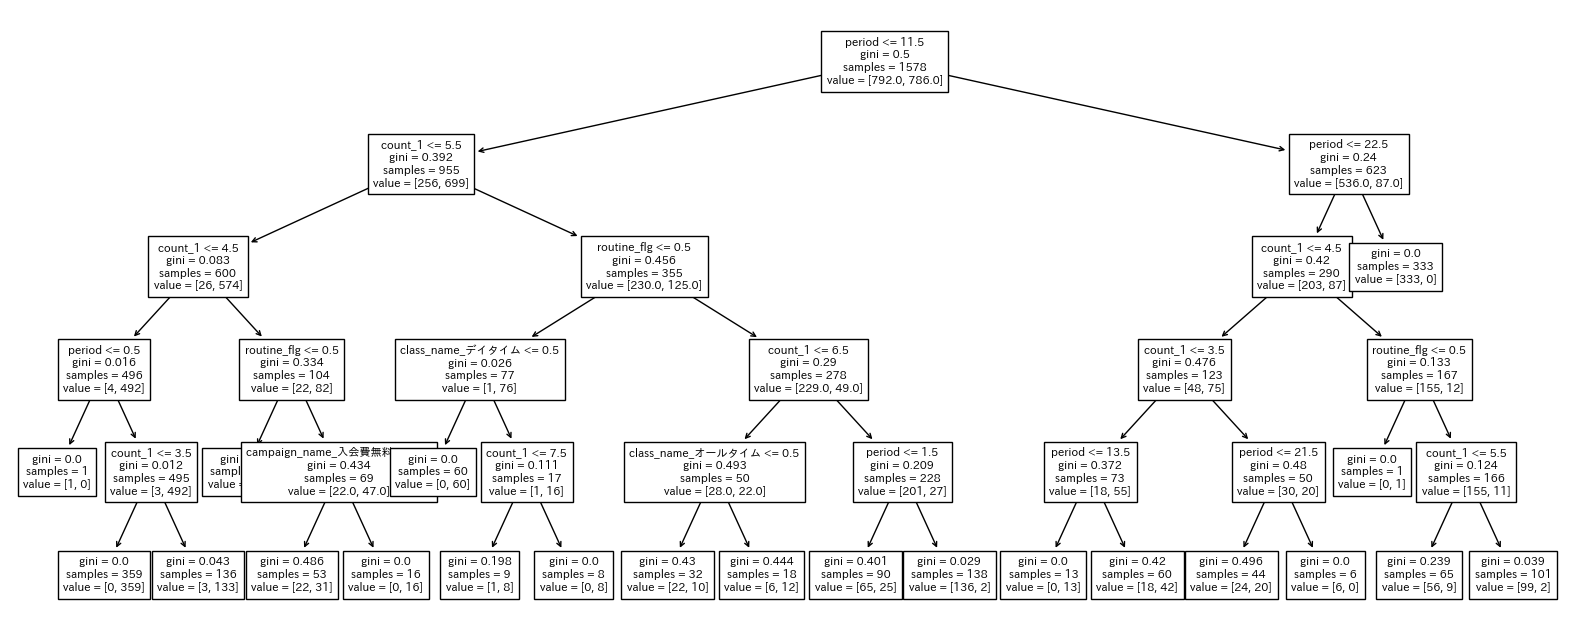

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

plt.figure(figsize=(20,8))
plot_tree(model, feature_names=X.columns, fontsize=8)

In [29]:
count_1 = 3
routine_flg = 1
period = 10
campaign_name = '入会費無料'
class_name = 'オールタイム'
gender = 'M'

In [30]:
if campaign_name == '入会費半額':
    campaign_name_list = [1,0]
elif campaign_name == '入会費無料':
    campaign_name_list = [0,1]
elif campaign_name == '通常':
    campaign_name_list = [0,0]

if class_name == 'オールタイム':
    class_name_list = [1,0]
elif class_name == 'デイタイム':
    class_name_list = [0,1]
elif class_name == 'ナイト':
    class_name_list = [0,0]

if gender == 'F':
    gender_list = [1]
elif gender == 'M':
    gender_list = [0]

input_data = [count_1, routine_flg, period]
input_data.extend(campaign_name_list)
input_data.extend(class_name_list)
input_data.extend(gender_list)
input_data = pd.DataFrame(data=[input_data], columns=X.columns)
input_data

,count_1,routine_flg,period,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,3,1,10,0,1,1,0,0


In [31]:
print(model.predict(input_data))
print(model.predict_proba(input_data))

[1.]
[[0. 1.]]
